### 분석 방향
1. 매출이 높으면 폐업률이 낮은가? 

2. 총 직장 인구 수가 높으면 폐업률이 낮은가? 

3. 유동인구가 많은 곳에서는 어떤 업종이 유리하고 불리한가?



In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv("업종별 평균 매출과 폐업률.csv")
data

,SERVICECODE,AVG_SALES,CLOSERATE
0,CS200033,6903882,2.092605
1,CS200016,8640381,3.318302
2,CS200030,12449685,2.690134
3,CS200029,12848249,1.887447
4,CS200037,13535746,3.112125
...,...,...,...
58,CS300031,186000656,0.634482
59,CS300006,191381245,0.818866
60,CS300002,194505980,3.313680
61,CS300032,258437683,0.559828


### 매출과 폐업률의 관련성

아래의 차트를 보면 매출이 낮을수록 폐업률이 높아진다. 

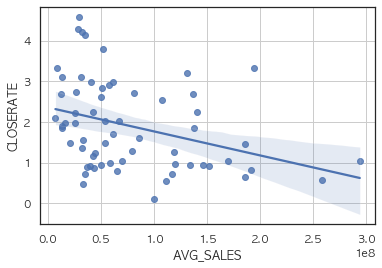

In [111]:
sns.regplot(x = "AVG_SALES", y = "CLOSERATE", data = data)
plt.grid()
plt.show()

In [112]:
import scipy.stats as stats

cor, pval = stats.pearsonr(data["AVG_SALES"], data["CLOSERATE"])
print("cor : {}, pval = {}".format(cor, pval))
# 코릴레이션이 마이너스이다. 이는 세일즈가 늘어날수록 폐업률이 낮아진다는 의미이다. 

cor : -0.3442631032083018, pval = 0.005731060560860959


In [113]:
data_table = pd.read_csv("datatable.csv")
data_table

,SERVICECODE,SERVICENAME,CLOSERATE,SALES,POPULATION
0,CS100001,한식음식점,3.122059,69653863,5850
1,CS100002,중식음식점,2.896212,81354060,6663
2,CS100003,일식음식점,2.966317,64412853,7029
3,CS100004,양식음식점,3.574627,54450384,7232
4,CS100005,제과점,2.470948,86720993,7208
...,...,...,...,...,...
58,CS300032,가전제품,0.947289,189150540,8738
59,CS300033,철물점,0.936469,40385353,5878
60,CS300035,인테리어,1.163664,47364236,6718
61,CS300036,조명용품,0.436242,103762337,6929


### 인구수와 폐업률의 관련성
아래의 차트를 보면 인구수가 늘어날수록 폐업률이 줄어든다.

In [114]:
dt_top = data_table[:10]
dt_top

,SERVICECODE,SERVICENAME,CLOSERATE,SALES,POPULATION
0,CS100001,한식음식점,3.122059,69653863,5850
1,CS100002,중식음식점,2.896212,81354060,6663
2,CS100003,일식음식점,2.966317,64412853,7029
3,CS100004,양식음식점,3.574627,54450384,7232
4,CS100005,제과점,2.470948,86720993,7208
5,CS100006,패스트푸드점,2.523846,52709243,7128
6,CS100007,치킨전문점,3.695675,50646406,6597
7,CS100008,분식전문점,4.131127,38702631,5966
8,CS100009,호프-간이주점,3.858209,48602721,6039
9,CS100010,커피-음료,3.500000,37889890,5869


In [115]:
dt_top.sort_values('CLOSERATE')

,SERVICECODE,SERVICENAME,CLOSERATE,SALES,POPULATION
4,CS100005,제과점,2.470948,86720993,7208
5,CS100006,패스트푸드점,2.523846,52709243,7128
1,CS100002,중식음식점,2.896212,81354060,6663
2,CS100003,일식음식점,2.966317,64412853,7029
0,CS100001,한식음식점,3.122059,69653863,5850
9,CS100010,커피-음료,3.500000,37889890,5869
3,CS100004,양식음식점,3.574627,54450384,7232
6,CS100007,치킨전문점,3.695675,50646406,6597
8,CS100009,호프-간이주점,3.858209,48602721,6039
7,CS100008,분식전문점,4.131127,38702631,5966


In [116]:
service_name_group_by = data_table.groupby(['SERVICENAME']).mean()
service_name_group_by


,CLOSERATE,SALES,POPULATION
SERVICENAME,,,
PC방,2.165638,80732360.0,6592.0
가구,0.805281,191567522.0,7012.0
가방,0.893773,67148838.0,10138.0
가전제품,0.947289,189150540.0,8738.0
가전제품수리,0.367925,23153478.0,9366.0
...,...,...,...
한의원,1.483962,86168334.0,7618.0
핸드폰,1.462934,50411031.0,7991.0
호프-간이주점,3.858209,48602721.0,6039.0


In [117]:
service_name_group_by.sort_values('CLOSERATE')
# 아래와 같이 가전제품.과 같은 제품쪽은 폐업률이 낮다. 음식점들은 폐업률이 상당히 높다. 

,CLOSERATE,SALES,POPULATION
SERVICENAME,,,
자전거 및 기타운송장비,0.201613,219659361.0,4744.0
가전제품수리,0.367925,23153478.0,9366.0
조명용품,0.436242,103762337.0,6929.0
미곡판매,0.444340,90938042.0,9837.0
문구,0.797068,160224102.0,7817.0
...,...,...,...
커피-음료,3.500000,37889890.0,5869.0
양식음식점,3.574627,54450384.0,7232.0
치킨전문점,3.695675,50646406.0,6597.0


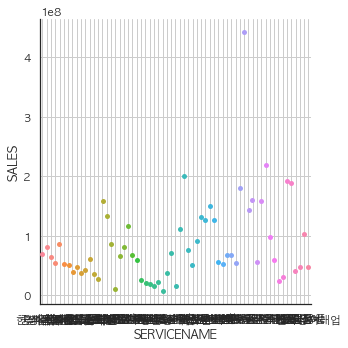

In [118]:
# 업종별 매출
plt.rcParams['font.family'] = 'AppleGothic'
sns.catplot(x = "SERVICENAME", y = "SALES", data = data_table)
plt.grid()
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()
# 업종에 따른 매출은 유의미하게 차이가 있다고 보긴 어렵다. 

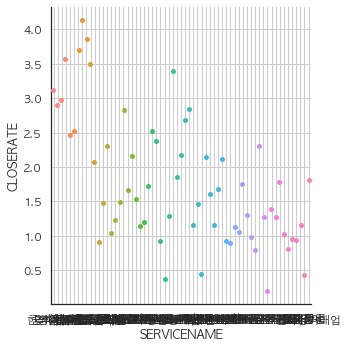

In [119]:
# 업종별 폐업률
plt.rcParams['font.family'] = 'AppleGothic'
sns.catplot(x = "SERVICENAME", y = "CLOSERATE", data = data_table)
plt.grid()
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()
# 업종이 잘 보이지 않지만 폐업률이 업종에 유의미하게 차이가 난다. 

In [120]:
data_table.sort_values('POPULATION')
# 유동인구별 정렬

,SERVICECODE,SERVICENAME,CLOSERATE,SALES,POPULATION
21,CS200025,자동차수리,1.144778,68708199,4703
52,CS300025,자전거 및 기타운송장비,0.201613,219659361,4744
12,CS200003,예술학원,1.476027,35260300,5648
23,CS200028,미용실,1.729790,26655042,5812
0,CS100001,한식음식점,3.122059,69653863,5850
...,...,...,...,...,...
38,CS300008,수산물판매,1.614114,126399514,9679
36,CS300006,미곡판매,0.444340,90938042,9837
43,CS300015,가방,0.893773,67148838,10138
53,CS300026,완구,1.385106,97977343,11410


In [121]:
#유동인구별 상위 50%
lenn = int(len(data_table)/2)
data_table.sort_values('POPULATION')[lenn:]

,SERVICECODE,SERVICENAME,CLOSERATE,SALES,POPULATION
55,CS300028,화초,1.788162,24955623,7133
14,CS200006,일반의원,1.033621,158375130,7182
4,CS100005,제과점,2.470948,86720993,7208
3,CS100004,양식음식점,3.574627,54450384,7232
29,CS200034,여관,3.394850,37830861,7341
56,CS300029,애완동물,1.022039,30722965,7604
16,CS200008,한의원,1.483962,86168334,7618
20,CS200024,스포츠클럽,1.534232,116982345,7659
62,CS300043,전자상거래업,1.817164,47254964,7680
40,CS300010,반찬가게,1.678254,127016386,7694


-0.3658472568067876 0.003191836002253985


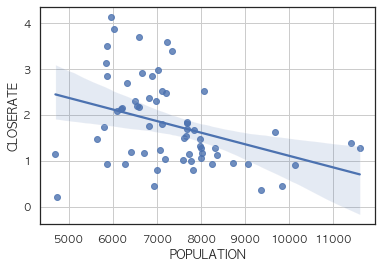

In [122]:
cor, pval = stats.pearsonr(data_table["POPULATION"], data_table["CLOSERATE"])
print(cor,pval)
# 유동인구와 폐업률은 유의미하게 음의 상관 관계를 가진다. 
sns.regplot(x = "POPULATION", y = "CLOSERATE", data = data_table)
plt.grid()
plt.show()
# 유동인구에 따라 부동산, 완구 등을 추천해줄수 있다. 

In [123]:
lenn = int(len(data_table)*0.6)
sorted_1 = data_table.sort_values('POPULATION')[lenn:]
lenn = int(len(data_table)*0.6)
sorted_2 = data_table.sort_values('SALES')[lenn:]

sorted_1 = sorted_1.reset_index()
sorted_1

sorted_2 = sorted_2.reset_index()
sorted_2

df_3 = pd.merge(sorted_1, sorted_2, left_on='SERVICENAME', right_on='SERVICENAME', how='inner')

df_3 = df_3.set_index("SERVICENAME")
df_3

# 아래는 인구수, 매출 기준 상위 40퍼에 둘다 들어간 데이터들임. 

,index_x,SERVICECODE_x,CLOSERATE_x,SALES_x,POPULATION_x,index_y,SERVICECODE_y,CLOSERATE_y,SALES_y,POPULATION_y
SERVICENAME,,,,,,,,,,
한의원,16,CS200008,1.483962,86168334,7618,16,CS200008,1.483962,86168334,7618
스포츠클럽,20,CS200024,1.534232,116982345,7659,20,CS200024,1.534232,116982345,7659
반찬가게,40,CS300010,1.678254,127016386,7694,40,CS300010,1.678254,127016386,7694
고시원,30,CS200036,1.850156,70500825,7695,30,CS200036,1.850156,70500825,7695
청과상,39,CS300009,1.152121,151064492,7736,39,CS300009,1.152121,151064492,7736
서적,48,CS300020,0.980887,142866289,7785,48,CS300020,0.980887,142866289,7785
문구,49,CS300021,0.797068,160224102,7817,49,CS300021,0.797068,160224102,7817
의료기기,47,CS300019,1.307252,442931414,7982,47,CS300019,1.307252,442931414,7982
컴퓨터및주변장치판매,34,CS300003,1.162463,75894908,8032,34,CS300003,1.162463,75894908,8032


### 결론
매출이 높으면 폐업률이 낮아진다. p값이 0.05이하이다.

인구수가 높으면 폐업률이 낮아진다. p값이 0.05이하이다.

업종에 따라 폐업률이 다르다. -> 음식점은 폐업률이 상당히 높다. 


결론으로는 인구수가 높고 매출이 잘 나올수 있으며 업종이 높은 업을 창업하면 폐업률이 낮아진다. 
